# Medical Imaging for Rural Areas - Google Colab Setup (FIXED)

This notebook will help you run your medical imaging project on Google Colab with free GPU access.

## Instructions:
1. Upload your project folder to Google Drive
2. Run this notebook in Google Colab
3. Enable GPU runtime: Runtime → Change runtime type → Hardware accelerator → GPU

## Step 1: Check GPU Availability and Mount Google Drive

In [ ]:
# Check if GPU is available
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("GPU not available. Please enable GPU runtime.")
    print("Go to: Runtime → Change runtime type → Hardware accelerator → GPU")

CUDA available: True
GPU device: Tesla T4
GPU memory: 14.7 GB


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to your project folder (update this path based on where you uploaded your project)
import os
os.chdir('/content/drive/MyDrive/Medical-Imaging-for-Rural-Areas-Early-Disease-Detection')

# Verify we're in the right directory
print("Current directory:", os.getcwd())
print("Files in directory:")
!ls -la

Mounted at /content/drive
Current directory: /content/drive/MyDrive/Medical-Imaging-for-Rural-Areas-Early-Disease-Detection
Files in directory:
total 4
drwx------ 2 root root 4096 Sep 26 06:23 Chest_Xray_Dataset


## Step 2: Install Required Packages

In [ ]:
# Install required packages
!pip install -q pyyaml
!pip install -q kaggle
!pip install -q tqdm

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("✅ All packages installed successfully!")

✅ All packages installed successfully!


## Step 3: Dataset Setup and Verification

In [ ]:
# Check for existing dataset
print("Current directory contents:")
!ls -la

print("\n🔍 Looking for dataset folders...")
import os

# Common dataset folder names to check
possible_paths = [
    "./chest_xray_merged",
    "./chest-xray-pneumoniacovid19tuberculosis",
    "./dataset",
    "./data",
    "./Chest_Xray_Dataset"
]

dataset_path = None
for path in possible_paths:
    if os.path.exists(path):
        print(f"✅ Found dataset at: {path}")
        dataset_path = path
        break

if dataset_path:
    print(f"\nDataset structure in {dataset_path}:")
    !ls -la {dataset_path}

    # Verify required folders
    required_folders = ['train', 'val', 'test']
    all_folders_exist = True

    for folder in required_folders:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
            print(f"✅ {folder}/ found with classes: {subfolders}")

            # Count images in each class
            for subfolder in subfolders:
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.exists(subfolder_path):
                    image_files = [f for f in os.listdir(subfolder_path)
                                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
                    print(f"   - {subfolder}: {len(image_files)} images")
        else:
            print(f"❌ {folder}/ folder not found!")
            all_folders_exist = False

    if all_folders_exist:
        print(f"\n✅ Dataset structure is correct! Using: {dataset_path}")
    else:
        print(f"\n⚠️ Dataset structure is incomplete. Please check folder structure.")

else:
    print("❌ Dataset folder not found. You need to either:")
    print("1. Upload your dataset to Google Drive and ensure correct path")
    print("2. Download dataset using Kaggle (see next cell)")
    all_folders_exist = False

Current directory contents:
total 4
drwx------ 2 root root 4096 Sep 26 06:23 Chest_Xray_Dataset

🔍 Looking for dataset folders...
✅ Found dataset at: ./Chest_Xray_Dataset

Dataset structure in ./Chest_Xray_Dataset:
total 12
drwx------ 2 root root 4096 Sep 26 06:23 test
drwx------ 2 root root 4096 Sep 26 06:23 train
drwx------ 2 root root 4096 Sep 26 06:23 val
✅ train/ found with classes: ['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']
   - TURBERCULOSIS: 650 images
   - PNEUMONIA: 3875 images
   - NORMAL: 1341 images
   - COVID19: 460 images
✅ val/ found with classes: ['TURBERCULOSIS', 'NORMAL', 'COVID19', 'PNEUMONIA']
   - TURBERCULOSIS: 12 images
   - NORMAL: 8 images
   - COVID19: 10 images
   - PNEUMONIA: 8 images
✅ test/ found with classes: ['PNEUMONIA', 'TURBERCULOSIS', 'NORMAL', 'COVID19']
   - PNEUMONIA: 390 images
   - TURBERCULOSIS: 41 images
   - NORMAL: 234 images
   - COVID19: 106 images

✅ Dataset structure is correct! Using: ./Chest_Xray_Dataset


In [ ]:
# If dataset not found, download it using Kaggle
# ⚠️ ONLY RUN THIS CELL IF DATASET WAS NOT FOUND ABOVE

if not dataset_path or not all_folders_exist:
    print("📥 Downloading dataset from Kaggle...")
    print("\n⚠️ You need to upload your kaggle.json file first!")
    print("To get kaggle.json:")
    print("1. Go to https://www.kaggle.com/account")
    print("2. Click 'Create New API Token'")
    print("3. Upload the downloaded kaggle.json file below")
    print("\nUncomment and run the following commands:")

    # Uncomment these lines when ready to download:
    # from google.colab import files
    # uploaded = files.upload()  # Upload your kaggle.json file

    # !mkdir -p ~/.kaggle
    # !cp kaggle.json ~/.kaggle/
    # !chmod 600 ~/.kaggle/kaggle.json

    # # Download and extract dataset
    # !kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis
    # !unzip -q chest-xray-pneumoniacovid19tuberculosis.zip

    # # Check what was extracted
    # !ls -la

    # # The dataset might extract with a different structure, let's organize it
    # if os.path.exists('chest-xray-pneumoniacovid19tuberculosis'):
    #     dataset_path = './chest-xray-pneumoniacovid19tuberculosis'
    #     print(f"✅ Dataset downloaded to: {dataset_path}")
    # else:
    #     # Look for other extracted folders
    #     for item in os.listdir('.'):
    #         if os.path.isdir(item) and 'chest' in item.lower():
    #             dataset_path = f'./{item}'
    #             print(f"✅ Found dataset at: {dataset_path}")
    #             break
else:
    print("✅ Dataset already found, skipping download.")

## Step 4: Load and Verify Dataset

In [ ]:
# Configuration for Colab
DATA_DIR = dataset_path if dataset_path else "./chest_xray_merged"
BATCH_SIZE = 32  # Colab can handle larger batch sizes
IMAGE_SIZE = (224, 224)
NUM_EPOCHS = 20  # Reduced for free tier
LEARNING_RATE = 0.001
NUM_CLASSES = 4

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Using device: {device}")
print(f"📁 Dataset directory: {DATA_DIR}")

# Create data transforms
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("✅ Transforms created successfully!")

🚀 Using device: cuda
📁 Dataset directory: ./Chest_Xray_Dataset
✅ Transforms created successfully!


In [ ]:
# Load datasets with error handling
try:
    print("📂 Loading datasets...")

    # Load train dataset
    train_dataset = torchvision.datasets.ImageFolder(
        os.path.join(DATA_DIR, 'train'),
        transform=train_transform
    )

    # Load validation dataset
    val_dataset = torchvision.datasets.ImageFolder(
        os.path.join(DATA_DIR, 'val'),
        transform=val_test_transform
    )

    # Load test dataset
    test_dataset = torchvision.datasets.ImageFolder(
        os.path.join(DATA_DIR, 'test'),
        transform=val_test_transform
    )

    print(f"✅ Datasets loaded successfully!")
    print(f"📊 Training samples: {len(train_dataset)}")
    print(f"📊 Validation samples: {len(val_dataset)}")
    print(f"📊 Test samples: {len(test_dataset)}")

    class_names = train_dataset.classes
    print(f"🏷️ Classes: {class_names}")

    # Verify we have samples
    if len(train_dataset) == 0 or len(val_dataset) == 0 or len(test_dataset) == 0:
        raise ValueError("One or more datasets are empty!")

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=2,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=2,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=2,
        pin_memory=True
    )

    print(f"🔄 Data loaders created successfully!")
    print(f"   - Train batches: {len(train_loader)}")
    print(f"   - Val batches: {len(val_loader)}")
    print(f"   - Test batches: {len(test_loader)}")

except FileNotFoundError as e:
    print(f"❌ Dataset folders not found: {e}")
    print("\n🔧 Troubleshooting steps:")
    print("1. Check if you uploaded the dataset to Google Drive")
    print("2. Verify the folder structure: train/, val/, test/ with class subfolders")
    print("3. Update the DATA_DIR path if needed")
    print("4. Or download dataset using Kaggle in the previous cell")

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("\n🔧 Possible solutions:")
    print("1. Check image file formats (should be .png, .jpg, .jpeg)")
    print("2. Ensure each class folder contains images")
    print("3. Verify folder permissions")

📂 Loading datasets...
✅ Datasets loaded successfully!
📊 Training samples: 6326
📊 Validation samples: 38
📊 Test samples: 771
🏷️ Classes: ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
🔄 Data loaders created successfully!
   - Train batches: 198
   - Val batches: 2
   - Test batches: 25


## Step 5: Visualize Sample Images

🖼️ Visualizing sample images...


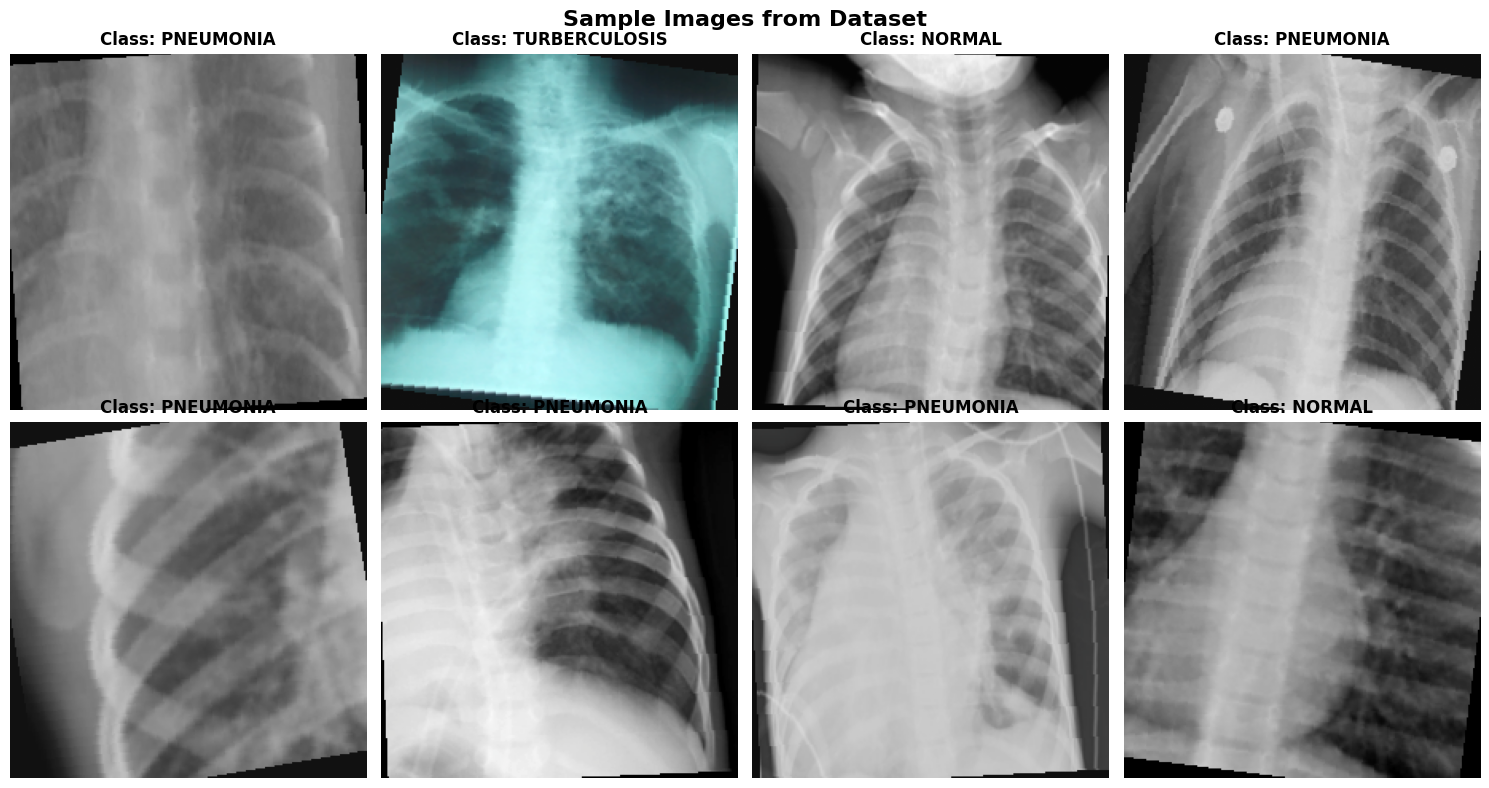

In [ ]:
# Visualize sample images from dataset
def visualize_samples(data_loader, class_names, num_samples=8):
    try:
        # Get a batch of training data
        images, labels = next(iter(data_loader))

        # Create a figure
        fig, axes = plt.subplots(2, 4, figsize=(15, 8))
        fig.suptitle('Sample Images from Dataset', fontsize=16, fontweight='bold')

        for i in range(min(num_samples, len(images))):
            row = i // 4
            col = i % 4

            # Denormalize image for display
            img = images[i].permute(1, 2, 0)
            img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            img = torch.clamp(img, 0, 1)

            axes[row, col].imshow(img)
            axes[row, col].set_title(f'Class: {class_names[labels[i]]}', fontweight='bold')
            axes[row, col].axis('off')

        # Hide empty subplots
        for i in range(len(images), num_samples):
            row = i // 4
            col = i % 4
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error visualizing samples: {e}")

# Only visualize if data loaders are available
if 'train_loader' in locals():
    print("🖼️ Visualizing sample images...")
    visualize_samples(train_loader, class_names)
else:
    print("⚠️ Cannot visualize samples - data loaders not created. Fix dataset issues first.")

## Step 6: Define Model Trainer

In [16]:
# Simple model trainer for Colab
class ColabModelTrainer:
    def __init__(self, model, device, num_classes):
        self.model = model.to(device)
        self.device = device
        self.num_classes = num_classes
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def train_model(self, train_loader, val_loader, num_epochs=20, learning_rate=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

        print(f"🚀 Starting training for {num_epochs} epochs...")

        for epoch in range(num_epochs):
            # Training phase
            self.model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
            for images, labels in train_bar:
                images, labels = images.to(self.device), labels.to(self.device)

                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                train_bar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Acc': f'{100.*correct/total:.2f}%'
                })

            train_loss = running_loss / len(train_loader)
            train_acc = 100. * correct / total

            # Validation phase
            val_loss, val_acc = self.validate(val_loader, criterion)

            # Update learning rate
            scheduler.step()

            # Store metrics
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.train_accuracies.append(train_acc)
            self.val_accuracies.append(val_acc)

            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            print('-' * 60)

        print("✅ Training completed!")
        return self.model

    def validate(self, val_loader, criterion):
        self.model.eval()
        running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = running_loss / len(val_loader)
        val_acc = 100. * correct / total

        return val_loss, val_acc

    def plot_training_history(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Loss plot
        ax1.plot(self.train_losses, label='Train Loss', color='blue', linewidth=2)
        ax1.plot(self.val_losses, label='Validation Loss', color='red', linewidth=2)
        ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Accuracy plot
        ax2.plot(self.train_accuracies, label='Train Accuracy', color='blue', linewidth=2)
        ax2.plot(self.val_accuracies, label='Validation Accuracy', color='red', linewidth=2)
        ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

print("✅ Model trainer defined successfully!")

✅ Model trainer defined successfully!


## Step 7: Define Models and Evaluation

In [15]:
# Function to create models
def create_model(model_name, num_classes=4):
    if model_name == 'ResNet50':
        model = torchvision.models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'DenseNet121':
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif model_name == 'EfficientNetB0':
        model = torchvision.models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError(f"Unknown model: {model_name}")

    return model

# Function to evaluate model
def evaluate_model(model, test_loader, class_names, device):
    model.eval()
    y_true = []
    y_pred = []

    print("📊 Evaluating model...")
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"✅ Test Accuracy: {accuracy:.4f}")

    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return y_true, y_pred, accuracy

print("✅ Model creation and evaluation functions defined!")

✅ Model creation and evaluation functions defined!


## Step 8: Train Models


🏋️ Training ResNet50
🚀 Starting training for 20 epochs...


Epoch 1/20 [Train]: 100%|██████████| 198/198 [10:04<00:00,  3.05s/it, Loss=0.3967, Acc=74.57%]


Epoch 1/20:
  Train Loss: 0.6410, Train Acc: 74.57%
  Val Loss: 0.8134, Val Acc: 57.89%
------------------------------------------------------------


Epoch 2/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.3684, Acc=81.60%]


Epoch 2/20:
  Train Loss: 0.4633, Train Acc: 81.60%
  Val Loss: 1.0459, Val Acc: 65.79%
------------------------------------------------------------


Epoch 3/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.4880, Acc=85.09%]


Epoch 3/20:
  Train Loss: 0.3963, Train Acc: 85.09%
  Val Loss: 0.6765, Val Acc: 73.68%
------------------------------------------------------------


Epoch 4/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.2585, Acc=86.41%]


Epoch 4/20:
  Train Loss: 0.3470, Train Acc: 86.41%
  Val Loss: 0.5759, Val Acc: 76.32%
------------------------------------------------------------


Epoch 5/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.2364, Acc=87.56%]


Epoch 5/20:
  Train Loss: 0.3342, Train Acc: 87.56%
  Val Loss: 0.4974, Val Acc: 81.58%
------------------------------------------------------------


Epoch 6/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s, Loss=0.3846, Acc=87.13%]


Epoch 6/20:
  Train Loss: 0.3266, Train Acc: 87.13%
  Val Loss: 0.6652, Val Acc: 73.68%
------------------------------------------------------------


Epoch 7/20 [Train]: 100%|██████████| 198/198 [02:27<00:00,  1.34it/s, Loss=0.3071, Acc=87.99%]


Epoch 7/20:
  Train Loss: 0.3247, Train Acc: 87.99%
  Val Loss: 0.7729, Val Acc: 76.32%
------------------------------------------------------------


Epoch 8/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.0468, Acc=91.15%]


Epoch 8/20:
  Train Loss: 0.2359, Train Acc: 91.15%
  Val Loss: 0.5809, Val Acc: 78.95%
------------------------------------------------------------


Epoch 9/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.1303, Acc=91.84%]


Epoch 9/20:
  Train Loss: 0.2112, Train Acc: 91.84%
  Val Loss: 0.4146, Val Acc: 86.84%
------------------------------------------------------------


Epoch 10/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.1232, Acc=92.57%]


Epoch 10/20:
  Train Loss: 0.1954, Train Acc: 92.57%
  Val Loss: 0.5069, Val Acc: 81.58%
------------------------------------------------------------


Epoch 11/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.2992, Acc=92.63%]


Epoch 11/20:
  Train Loss: 0.1947, Train Acc: 92.63%
  Val Loss: 0.5773, Val Acc: 78.95%
------------------------------------------------------------


Epoch 12/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.31it/s, Loss=0.0895, Acc=93.03%]


Epoch 12/20:
  Train Loss: 0.1829, Train Acc: 93.03%
  Val Loss: 0.6526, Val Acc: 78.95%
------------------------------------------------------------


Epoch 13/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.3915, Acc=93.30%]


Epoch 13/20:
  Train Loss: 0.1777, Train Acc: 93.30%
  Val Loss: 0.3836, Val Acc: 86.84%
------------------------------------------------------------


Epoch 14/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.30it/s, Loss=0.0677, Acc=93.20%]


Epoch 14/20:
  Train Loss: 0.1826, Train Acc: 93.20%
  Val Loss: 0.3656, Val Acc: 84.21%
------------------------------------------------------------


Epoch 15/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.2904, Acc=93.76%]


Epoch 15/20:
  Train Loss: 0.1693, Train Acc: 93.76%
  Val Loss: 0.4490, Val Acc: 81.58%
------------------------------------------------------------


Epoch 16/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.1546, Acc=94.06%]


Epoch 16/20:
  Train Loss: 0.1643, Train Acc: 94.06%
  Val Loss: 0.6226, Val Acc: 76.32%
------------------------------------------------------------


Epoch 17/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.0255, Acc=94.25%]


Epoch 17/20:
  Train Loss: 0.1610, Train Acc: 94.25%
  Val Loss: 0.6662, Val Acc: 81.58%
------------------------------------------------------------


Epoch 18/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.0382, Acc=93.88%]


Epoch 18/20:
  Train Loss: 0.1605, Train Acc: 93.88%
  Val Loss: 0.5871, Val Acc: 78.95%
------------------------------------------------------------


Epoch 19/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.1360, Acc=93.96%]


Epoch 19/20:
  Train Loss: 0.1546, Train Acc: 93.96%
  Val Loss: 0.5768, Val Acc: 76.32%
------------------------------------------------------------


Epoch 20/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.31it/s, Loss=0.0427, Acc=94.31%]


Epoch 20/20:
  Train Loss: 0.1497, Train Acc: 94.31%
  Val Loss: 0.5412, Val Acc: 81.58%
------------------------------------------------------------
✅ Training completed!


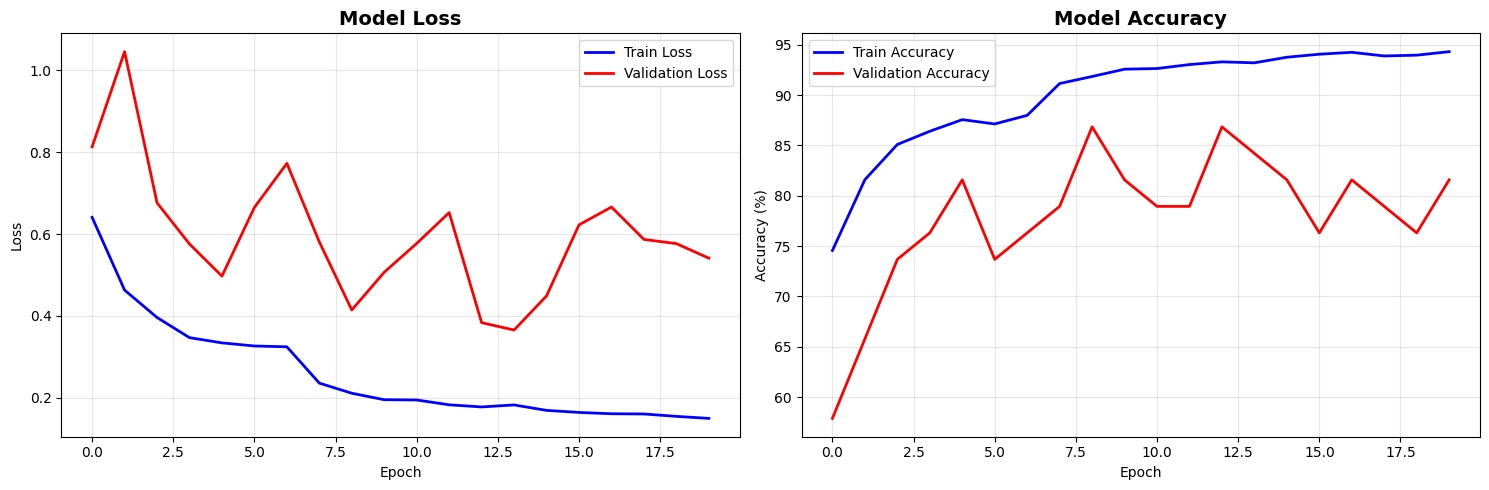


📊 Evaluating ResNet50...
📊 Evaluating model...


Testing: 100%|██████████| 25/25 [02:31<00:00,  6.07s/it]


✅ Test Accuracy: 0.9313

📋 Classification Report:
               precision    recall  f1-score   support

      COVID19       1.00      0.96      0.98       106
       NORMAL       0.98      0.80      0.88       234
    PNEUMONIA       0.90      0.99      0.94       390
TURBERCULOSIS       0.89      1.00      0.94        41

     accuracy                           0.93       771
    macro avg       0.94      0.94      0.94       771
 weighted avg       0.94      0.93      0.93       771



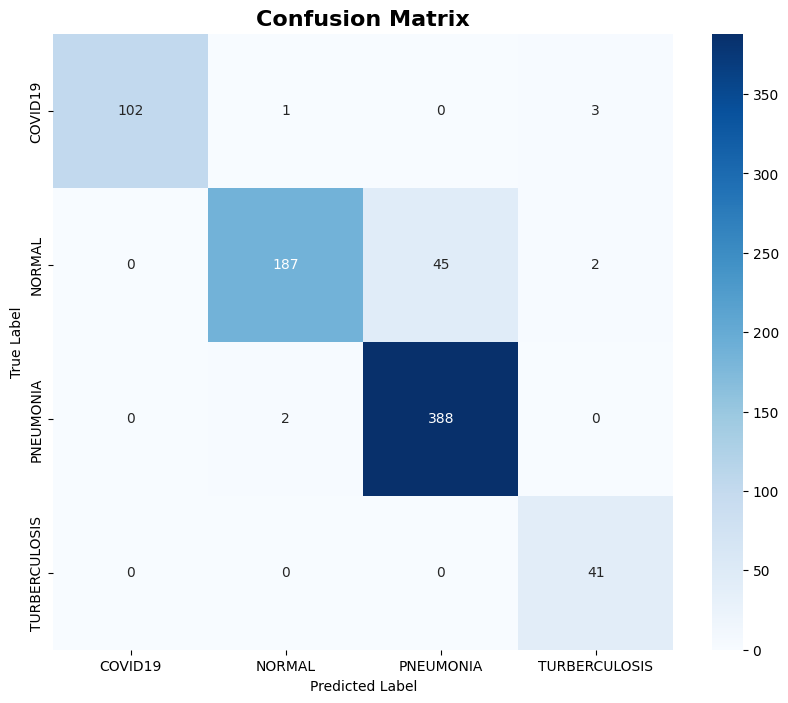

💾 Model saved to ./models/ResNet50_colab.pth

🏋️ Training DenseNet121
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 153MB/s]


🚀 Starting training for 20 epochs...


Epoch 1/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.29it/s, Loss=0.3854, Acc=81.50%]


Epoch 1/20:
  Train Loss: 0.4700, Train Acc: 81.50%
  Val Loss: 0.6659, Val Acc: 68.42%
------------------------------------------------------------


Epoch 2/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s, Loss=0.5083, Acc=86.04%]


Epoch 2/20:
  Train Loss: 0.3581, Train Acc: 86.04%
  Val Loss: 0.4847, Val Acc: 71.05%
------------------------------------------------------------


Epoch 3/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.30it/s, Loss=0.1319, Acc=87.86%]


Epoch 3/20:
  Train Loss: 0.3162, Train Acc: 87.86%
  Val Loss: 0.6474, Val Acc: 73.68%
------------------------------------------------------------


Epoch 4/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s, Loss=0.2686, Acc=89.06%]


Epoch 4/20:
  Train Loss: 0.2807, Train Acc: 89.06%
  Val Loss: 0.5023, Val Acc: 76.32%
------------------------------------------------------------


Epoch 5/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.0642, Acc=90.14%]


Epoch 5/20:
  Train Loss: 0.2645, Train Acc: 90.14%
  Val Loss: 0.3155, Val Acc: 86.84%
------------------------------------------------------------


Epoch 6/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.2072, Acc=90.29%]


Epoch 6/20:
  Train Loss: 0.2591, Train Acc: 90.29%
  Val Loss: 0.3131, Val Acc: 86.84%
------------------------------------------------------------


Epoch 7/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.2039, Acc=90.34%]


Epoch 7/20:
  Train Loss: 0.2536, Train Acc: 90.34%
  Val Loss: 0.2900, Val Acc: 81.58%
------------------------------------------------------------


Epoch 8/20 [Train]: 100%|██████████| 198/198 [02:28<00:00,  1.33it/s, Loss=0.1675, Acc=92.79%]


Epoch 8/20:
  Train Loss: 0.1983, Train Acc: 92.79%
  Val Loss: 0.4088, Val Acc: 81.58%
------------------------------------------------------------


Epoch 9/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.2769, Acc=94.01%]


Epoch 9/20:
  Train Loss: 0.1714, Train Acc: 94.01%
  Val Loss: 0.3488, Val Acc: 76.32%
------------------------------------------------------------


Epoch 10/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.33it/s, Loss=0.0822, Acc=94.18%]


Epoch 10/20:
  Train Loss: 0.1579, Train Acc: 94.18%
  Val Loss: 0.3128, Val Acc: 78.95%
------------------------------------------------------------


Epoch 11/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.0590, Acc=94.55%]


Epoch 11/20:
  Train Loss: 0.1545, Train Acc: 94.55%
  Val Loss: 0.2152, Val Acc: 92.11%
------------------------------------------------------------


Epoch 12/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.1262, Acc=94.64%]


Epoch 12/20:
  Train Loss: 0.1517, Train Acc: 94.64%
  Val Loss: 0.2838, Val Acc: 81.58%
------------------------------------------------------------


Epoch 13/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.30it/s, Loss=0.3455, Acc=94.70%]


Epoch 13/20:
  Train Loss: 0.1493, Train Acc: 94.70%
  Val Loss: 0.2746, Val Acc: 81.58%
------------------------------------------------------------


Epoch 14/20 [Train]: 100%|██████████| 198/198 [02:29<00:00,  1.32it/s, Loss=0.2440, Acc=94.97%]


Epoch 14/20:
  Train Loss: 0.1382, Train Acc: 94.97%
  Val Loss: 0.1974, Val Acc: 86.84%
------------------------------------------------------------


Epoch 15/20 [Train]: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s, Loss=0.1232, Acc=94.99%]


Epoch 15/20:
  Train Loss: 0.1314, Train Acc: 94.99%
  Val Loss: 0.1731, Val Acc: 86.84%
------------------------------------------------------------


Epoch 16/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s, Loss=0.0781, Acc=95.91%]


Epoch 16/20:
  Train Loss: 0.1201, Train Acc: 95.91%
  Val Loss: 0.2012, Val Acc: 86.84%
------------------------------------------------------------


Epoch 17/20 [Train]: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s, Loss=0.1185, Acc=95.81%]


Epoch 17/20:
  Train Loss: 0.1222, Train Acc: 95.81%
  Val Loss: 0.1676, Val Acc: 89.47%
------------------------------------------------------------


Epoch 18/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.31it/s, Loss=0.0852, Acc=95.53%]


Epoch 18/20:
  Train Loss: 0.1218, Train Acc: 95.53%
  Val Loss: 0.2140, Val Acc: 81.58%
------------------------------------------------------------


Epoch 19/20 [Train]: 100%|██████████| 198/198 [02:35<00:00,  1.28it/s, Loss=0.0580, Acc=95.57%]


Epoch 19/20:
  Train Loss: 0.1214, Train Acc: 95.57%
  Val Loss: 0.2080, Val Acc: 84.21%
------------------------------------------------------------


Epoch 20/20 [Train]: 100%|██████████| 198/198 [02:31<00:00,  1.30it/s, Loss=0.1658, Acc=95.67%]


Epoch 20/20:
  Train Loss: 0.1197, Train Acc: 95.67%
  Val Loss: 0.2208, Val Acc: 81.58%
------------------------------------------------------------
✅ Training completed!


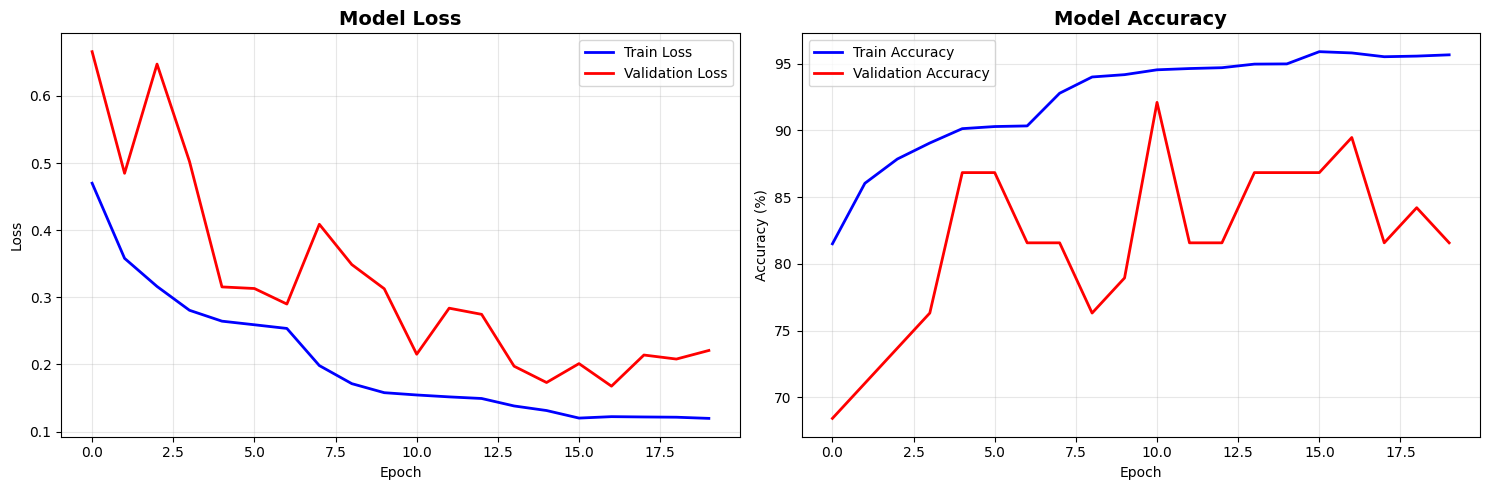


📊 Evaluating DenseNet121...
📊 Evaluating model...


Testing: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]


✅ Test Accuracy: 0.9377

📋 Classification Report:
               precision    recall  f1-score   support

      COVID19       1.00      0.96      0.98       106
       NORMAL       0.99      0.82      0.89       234
    PNEUMONIA       0.90      1.00      0.95       390
TURBERCULOSIS       0.89      1.00      0.94        41

     accuracy                           0.94       771
    macro avg       0.95      0.94      0.94       771
 weighted avg       0.94      0.94      0.94       771



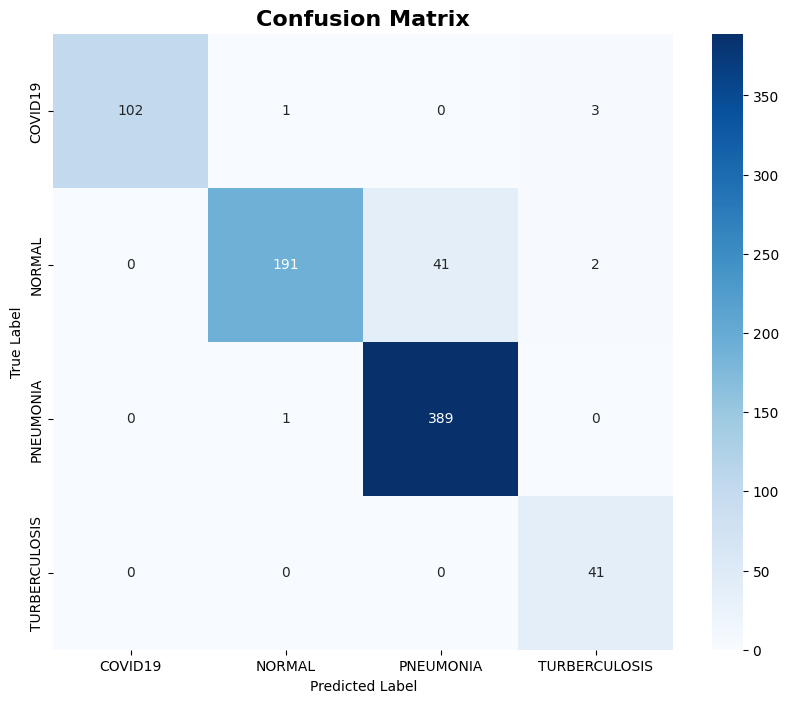

💾 Model saved to ./models/DenseNet121_colab.pth

🏋️ Training EfficientNetB0
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 172MB/s]


🚀 Starting training for 20 epochs...


Epoch 1/20 [Train]: 100%|██████████| 198/198 [02:19<00:00,  1.42it/s, Loss=0.3505, Acc=84.95%]


Epoch 1/20:
  Train Loss: 0.3941, Train Acc: 84.95%
  Val Loss: 0.2746, Val Acc: 81.58%
------------------------------------------------------------


Epoch 2/20 [Train]: 100%|██████████| 198/198 [02:19<00:00,  1.42it/s, Loss=0.2723, Acc=91.05%]


Epoch 2/20:
  Train Loss: 0.2507, Train Acc: 91.05%
  Val Loss: 0.5139, Val Acc: 73.68%
------------------------------------------------------------


Epoch 3/20 [Train]: 100%|██████████| 198/198 [02:18<00:00,  1.43it/s, Loss=0.1468, Acc=91.72%]


Epoch 3/20:
  Train Loss: 0.2255, Train Acc: 91.72%
  Val Loss: 0.6131, Val Acc: 78.95%
------------------------------------------------------------


Epoch 4/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.2459, Acc=92.67%]


Epoch 4/20:
  Train Loss: 0.2038, Train Acc: 92.67%
  Val Loss: 0.2164, Val Acc: 84.21%
------------------------------------------------------------


Epoch 5/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0647, Acc=92.87%]


Epoch 5/20:
  Train Loss: 0.1916, Train Acc: 92.87%
  Val Loss: 0.3250, Val Acc: 89.47%
------------------------------------------------------------


Epoch 6/20 [Train]: 100%|██████████| 198/198 [02:16<00:00,  1.45it/s, Loss=0.1265, Acc=93.19%]


Epoch 6/20:
  Train Loss: 0.1803, Train Acc: 93.19%
  Val Loss: 0.2216, Val Acc: 81.58%
------------------------------------------------------------


Epoch 7/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.1873, Acc=93.61%]


Epoch 7/20:
  Train Loss: 0.1770, Train Acc: 93.61%
  Val Loss: 0.3098, Val Acc: 81.58%
------------------------------------------------------------


Epoch 8/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0870, Acc=95.34%]


Epoch 8/20:
  Train Loss: 0.1284, Train Acc: 95.34%
  Val Loss: 0.3573, Val Acc: 73.68%
------------------------------------------------------------


Epoch 9/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.1986, Acc=96.22%]


Epoch 9/20:
  Train Loss: 0.1052, Train Acc: 96.22%
  Val Loss: 0.2908, Val Acc: 76.32%
------------------------------------------------------------


Epoch 10/20 [Train]: 100%|██████████| 198/198 [02:16<00:00,  1.45it/s, Loss=0.1145, Acc=96.35%]


Epoch 10/20:
  Train Loss: 0.1012, Train Acc: 96.35%
  Val Loss: 0.2612, Val Acc: 84.21%
------------------------------------------------------------


Epoch 11/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0089, Acc=96.43%]


Epoch 11/20:
  Train Loss: 0.0980, Train Acc: 96.43%
  Val Loss: 0.2782, Val Acc: 78.95%
------------------------------------------------------------


Epoch 12/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0261, Acc=96.85%]


Epoch 12/20:
  Train Loss: 0.0912, Train Acc: 96.85%
  Val Loss: 0.2433, Val Acc: 78.95%
------------------------------------------------------------


Epoch 13/20 [Train]: 100%|██████████| 198/198 [02:16<00:00,  1.45it/s, Loss=0.0563, Acc=96.92%]


Epoch 13/20:
  Train Loss: 0.0854, Train Acc: 96.92%
  Val Loss: 0.1536, Val Acc: 86.84%
------------------------------------------------------------


Epoch 14/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0339, Acc=96.71%]


Epoch 14/20:
  Train Loss: 0.0876, Train Acc: 96.71%
  Val Loss: 0.2724, Val Acc: 84.21%
------------------------------------------------------------


Epoch 15/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.3314, Acc=97.01%]


Epoch 15/20:
  Train Loss: 0.0828, Train Acc: 97.01%
  Val Loss: 0.2603, Val Acc: 84.21%
------------------------------------------------------------


Epoch 16/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0281, Acc=97.03%]


Epoch 16/20:
  Train Loss: 0.0796, Train Acc: 97.03%
  Val Loss: 0.2612, Val Acc: 84.21%
------------------------------------------------------------


Epoch 17/20 [Train]: 100%|██████████| 198/198 [02:16<00:00,  1.45it/s, Loss=0.1433, Acc=97.44%]


Epoch 17/20:
  Train Loss: 0.0790, Train Acc: 97.44%
  Val Loss: 0.2357, Val Acc: 84.21%
------------------------------------------------------------


Epoch 18/20 [Train]: 100%|██████████| 198/198 [02:17<00:00,  1.44it/s, Loss=0.0055, Acc=97.34%]


Epoch 18/20:
  Train Loss: 0.0750, Train Acc: 97.34%
  Val Loss: 0.2144, Val Acc: 86.84%
------------------------------------------------------------


Epoch 19/20 [Train]: 100%|██████████| 198/198 [02:18<00:00,  1.43it/s, Loss=0.0789, Acc=96.74%]


Epoch 19/20:
  Train Loss: 0.0833, Train Acc: 96.74%
  Val Loss: 0.2371, Val Acc: 86.84%
------------------------------------------------------------


Epoch 20/20 [Train]: 100%|██████████| 198/198 [02:16<00:00,  1.45it/s, Loss=0.0388, Acc=97.17%]


Epoch 20/20:
  Train Loss: 0.0820, Train Acc: 97.17%
  Val Loss: 0.2526, Val Acc: 84.21%
------------------------------------------------------------
✅ Training completed!


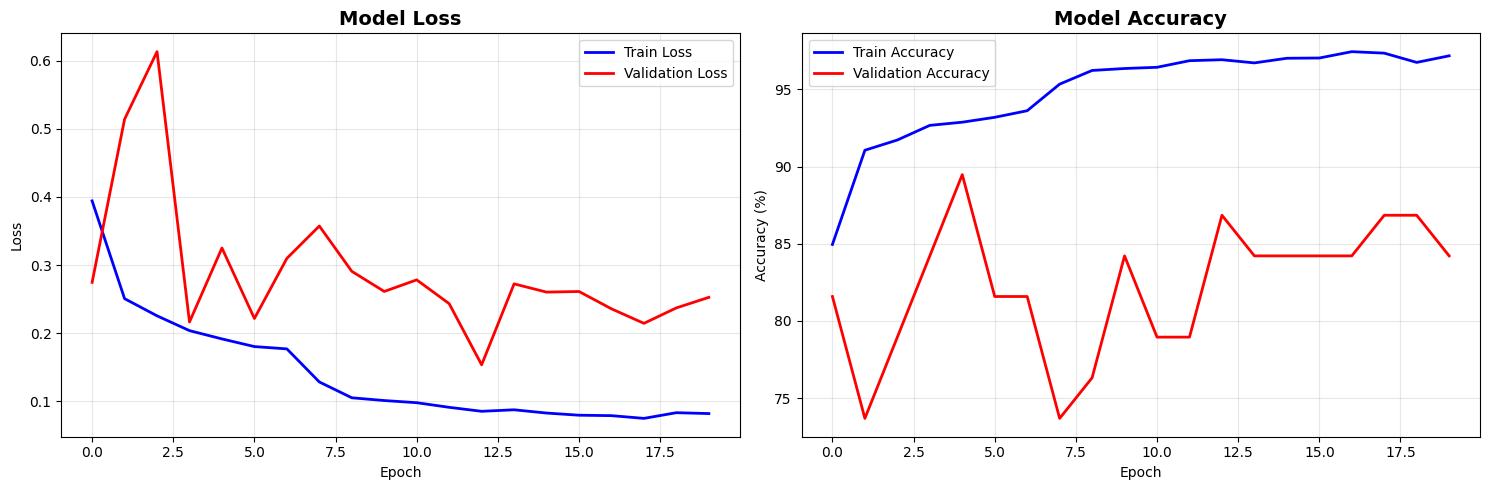


📊 Evaluating EfficientNetB0...
📊 Evaluating model...


Testing: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]


✅ Test Accuracy: 0.9131

📋 Classification Report:
               precision    recall  f1-score   support

      COVID19       1.00      0.98      0.99       106
       NORMAL       0.98      0.73      0.84       234
    PNEUMONIA       0.86      1.00      0.92       390
TURBERCULOSIS       1.00      1.00      1.00        41

     accuracy                           0.91       771
    macro avg       0.96      0.93      0.94       771
 weighted avg       0.92      0.91      0.91       771



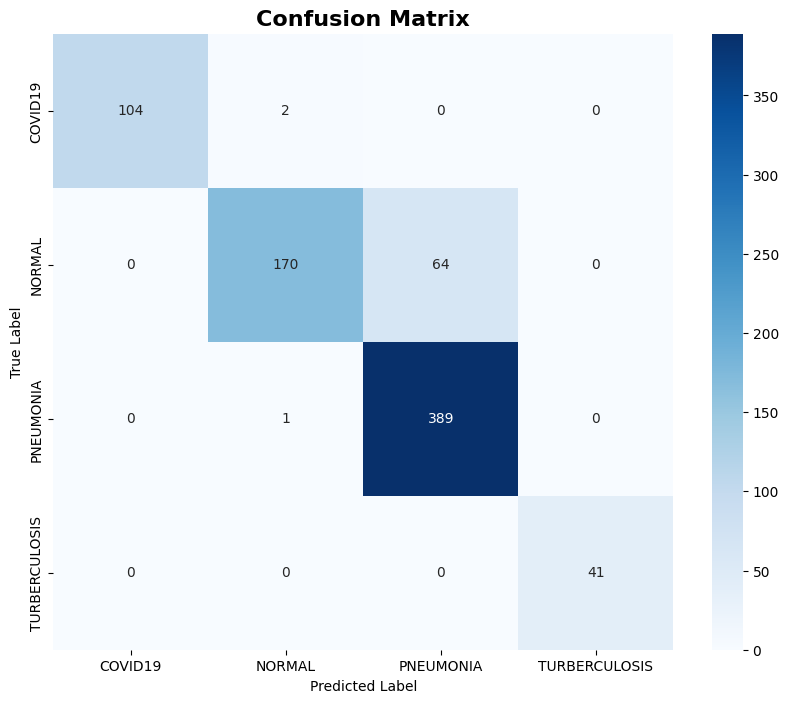

💾 Model saved to ./models/EfficientNetB0_colab.pth


In [12]:
# Only proceed if we have data loaders
if 'train_loader' in locals() and 'val_loader' in locals() and 'test_loader' in locals():
    # Models to train
    model_names = ['ResNet50', 'DenseNet121', 'EfficientNetB0']
    results = {}

    # Create models directory
    os.makedirs("./models", exist_ok=True)

    # Train each model
    for model_name in model_names:
        print(f"\n🏋️ Training {model_name}")
        print("=" * 60)

        try:
            # Create model
            model = create_model(model_name, NUM_CLASSES)

            # Create trainer
            trainer = ColabModelTrainer(model, device, NUM_CLASSES)

            # Train model
            trained_model = trainer.train_model(
                train_loader,
                val_loader,
                num_epochs=NUM_EPOCHS,
                learning_rate=LEARNING_RATE
            )

            # Plot training history
            trainer.plot_training_history()

            # Evaluate model
            print(f"\n📊 Evaluating {model_name}...")
            y_true, y_pred, accuracy = evaluate_model(
                trained_model, test_loader, class_names, device
            )

            # Save model
            model_path = os.path.join("./models", f"{model_name}_colab.pth")
            torch.save(trained_model.state_dict(), model_path)
            print(f"💾 Model saved to {model_path}")

            results[model_name] = {
                'model': trained_model,
                'trainer': trainer,
                'accuracy': accuracy,
                'predictions': (y_true, y_pred)
            }

        except Exception as e:
            print(f"❌ Error training {model_name}: {e}")
            continue

else:
    print("❌ Cannot train models - data loaders not available.")
    print("Please fix dataset issues first.")

## Step 9: Compare Results


🏆 FINAL RESULTS COMPARISON
ResNet50: 0.9313 (93.13%)
DenseNet121: 0.9377 (93.77%)
EfficientNetB0: 0.9131 (91.31%)

🥇 Best model: DenseNet121 with accuracy: 0.9377 (93.77%)


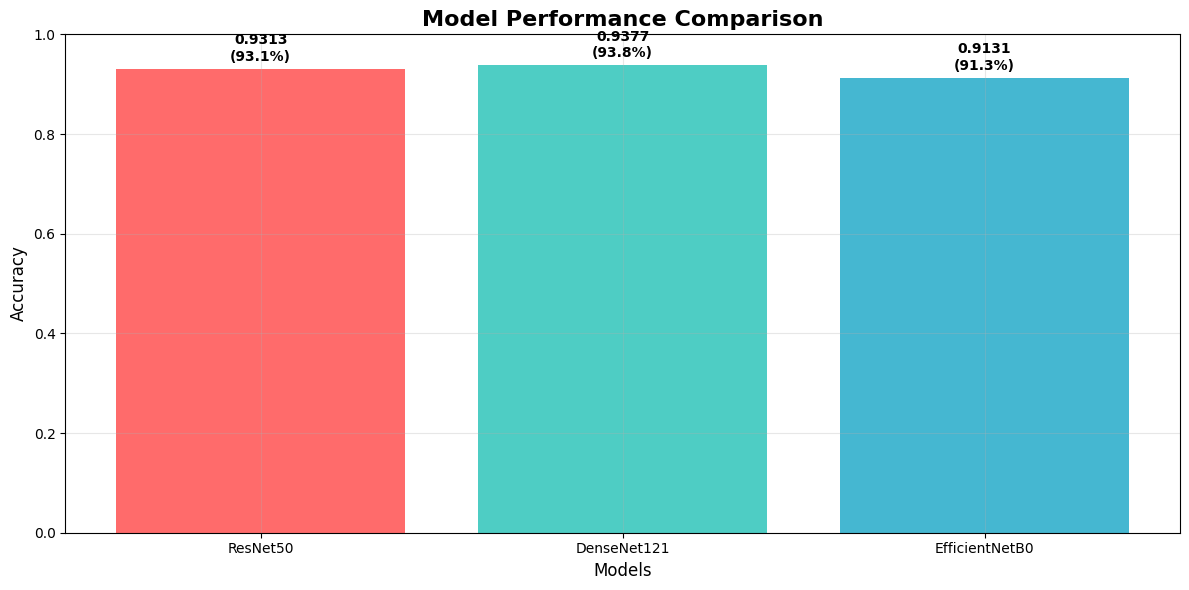


✅ Training completed successfully in Google Colab!
🎉 Your models are ready for deployment!


In [13]:
# Compare results if available
if 'results' in locals() and results:
    print("\n🏆 FINAL RESULTS COMPARISON")
    print("=" * 60)

    model_names_list = []
    accuracies_list = []

    for model_name, result in results.items():
        print(f"{model_name}: {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")
        model_names_list.append(model_name)
        accuracies_list.append(result['accuracy'])

    # Find best model
    best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
    print(f"\n🥇 Best model: {best_model[0]} with accuracy: {best_model[1]['accuracy']:.4f} ({best_model[1]['accuracy']*100:.2f}%)")

    # Plot comparison
    if len(model_names_list) > 0:
        plt.figure(figsize=(12, 6))
        bars = plt.bar(model_names_list, accuracies_list,
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
        plt.xlabel('Models', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.ylim(0, 1)

        # Add value labels on bars
        for bar, acc in zip(bars, accuracies_list):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                    f'{acc:.4f}\n({acc*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    print("\n✅ Training completed successfully in Google Colab!")
    print("🎉 Your models are ready for deployment!")

else:
    print("⚠️ No results to compare. Please run the training first.")

## Step 10: Download Models (Optional)

In [14]:
# Download trained models to your local machine
from google.colab import files

print("📥 Available models for download:")
if os.path.exists('./models'):
    model_files = [f for f in os.listdir('./models') if f.endswith('.pth')]
    for i, file in enumerate(model_files, 1):
        file_size = os.path.getsize(f'./models/{file}') / (1024*1024)  # MB
        print(f"{i}. {file} ({file_size:.1f} MB)")

    print("\n💡 To download a model, uncomment one of the lines below:")
    for file in model_files:
        print(f"# files.download('./models/{file}')")

    print("\n📋 To download all models:")
    print("# for file in model_files:")
    print("#     files.download(f'./models/{file}')")

else:
    print("❌ No models folder found. Train the models first.")

📥 Available models for download:
1. ResNet50_colab.pth (90.0 MB)
2. DenseNet121_colab.pth (27.1 MB)
3. EfficientNetB0_colab.pth (15.6 MB)

💡 To download a model, uncomment one of the lines below:
# files.download('./models/ResNet50_colab.pth')
# files.download('./models/DenseNet121_colab.pth')
# files.download('./models/EfficientNetB0_colab.pth')

📋 To download all models:
# for file in model_files:
#     files.download(f'./models/{file}')
